In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
ds=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/rr_monthly_0.25.1900-2015.nc')
rr=ds.rr
ds2=xr.open_dataset('/home/563/lx7831/ncfile/sst.mnmean.nc')
sst=ds2.sst
nino3_area=sst.sel(lat=slice(5,-5),lon=slice(210,270))
nino34_area=sst.sel(lat=slice(5,-5),lon=slice(190,240))
nino4_area=sst.sel(lat=slice(5,-5),lon=slice(160,210))
nino3_climate=nino3_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino34_climate=nino34_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino4_climate=nino4_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino3_anomaly=(nino3_area.groupby('time.month')-nino3_climate).mean(dim='lat').mean(dim='lon')
nino34_anomaly=(nino34_area.groupby('time.month')-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area.groupby('time.month')-nino4_climate).mean(dim='lat').mean(dim='lon')
alpha=xr.where(nino3_anomaly*nino4_anomaly>0,0.4,0)
nct=nino3_anomaly-alpha*nino4_anomaly
nwp=nino4_anomaly-alpha*nino3_anomaly
nino3_rolling=nino3_anomaly.rolling(time=5).mean()
nino34_rolling=nino34_anomaly.rolling(time=5).mean()
nino4_rolling=nino4_anomaly.rolling(time=5).mean()
nct_rolling=nct.rolling(time=5).mean()
nwp_rolling=nwp.rolling(time=5).mean()
nino3_modern=nino3_rolling.sel(time=slice('1900','2015'))
nino34_modern=nino34_rolling.sel(time=slice('1900','2015'))
nino4_modern=nino4_rolling.sel(time=slice('1900','2015'))
nct_modern=nct_rolling.sel(time=slice('1900','2015'))
nwp_modern=nwp_rolling.sel(time=slice('1900','2015'))
nino3_DJF=nino3_modern.groupby('time.season')['DJF']
nino34_DJF=nino34_modern.groupby('time.season')['DJF']
nino4_DJF=nino4_modern.groupby('time.season')['DJF']
nct_DJF=nct_modern.groupby('time.season')['DJF']
nwp_DJF=nwp_modern.groupby('time.season')['DJF']
nino3_SON=nino3_modern.groupby('time.season')['SON']
nino34_SON=nino34_modern.groupby('time.season')['SON']
nino4_SON=nino4_modern.groupby('time.season')['SON']
nct_SON=nct_modern.groupby('time.season')['SON']
nwp_SON=nwp_modern.groupby('time.season')['SON']
nino3_MAM=nino3_modern.groupby('time.season')['MAM']
nino34_MAM=nino34_modern.groupby('time.season')['MAM']
nino4_MAM=nino4_modern.groupby('time.season')['MAM']
nct_MAM=nct_modern.groupby('time.season')['MAM']
nwp_MAM=nwp_modern.groupby('time.season')['MAM']

In [3]:
nct_summer=nct_DJF.resample(time='AS-DEC').mean()
nwp_summer=nwp_DJF.resample(time='AS-DEC').mean()
nino3_summer=nino3_DJF.resample(time='AS-DEC').mean()
nino4_summer=nino4_DJF.resample(time='AS-DEC').mean()
nino34_summer=nino34_DJF.resample(time='AS-DEC').mean()
nct_spring=nct_SON.resample(time='AS-SEP').mean()
nwp_spring=nwp_SON.resample(time='AS-SEP').mean()
nino3_spring=nino3_SON.resample(time='AS-SEP').mean()
nino4_spring=nino4_SON.resample(time='AS-SEP').mean()
nino34_spring=nino34_SON.resample(time='AS-SEP').mean()
nct_autumn=nct_MAM.resample(time='AS-MAR').mean()
nwp_autumn=nwp_MAM.resample(time='AS-MAR').mean()
nino3_autumn=nino3_MAM.resample(time='AS-MAR').mean()
nino4_autumn=nino4_MAM.resample(time='AS-MAR').mean()
nino34_autumn=nino34_MAM.resample(time='AS-MAR').mean()

In [4]:
rr_climate=rr.groupby('time.month').mean(dim='time')
rr_anomaly=(rr.groupby('time.month')-rr_climate)
rr_DJF=rr_anomaly.groupby('time.season')['DJF']
rr_summer=rr_DJF.resample(time='AS-DEC').mean()

In [5]:
nino_rr=rr_summer.where(nino34_summer > 0.5, drop = True)

In [6]:
nino_rr

<xarray.DataArray 'rr' (time: 39, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -3.9133945 ,
         -3.8893409 , -3.7967856 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.9271827 ,
         -3.9626741 , -3.793651  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.937211  ,
         -3.9988317 , -3.9497159 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -3.4174888 ,
         -2.9050148 , -2.4563668 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.3822024 ,
         -2.8750331 , -2.4323716 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.312883  ,
         -2.8169312 , -2.5540478 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -3.5623105 ,
         -3.538604  , -3.4471428 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.5668385 ,
         -3.602023  , -3.440678  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.5669987 ,
         -3.628708  , -3.5797741 ],
...
        [ 0.        ,  0.        ,  0.        , ..., -3.1678295 ,
         -2.7209141 , -2.3317091 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.1357841 ,
         -2.6937027 , -2.3096762 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.0743377 ,
         -2.6424408 , -2.4145408 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.5843718 ,
         -0.49767494, -0.37047863],
        [ 0.        ,  0.        ,  0.        , ..., -0.60996556,
         -0.57435894, -0.37386227],
        [ 0.        ,  0.        ,  0.        , ..., -0.6308296 ,
         -0.61550236, -0.50857615],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.6686995 ,
         -2.35285   , -2.0824893 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.6430602 ,
         -2.3311243 , -2.0643432 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.5973122 ,
         -2.2935078 , -2.1355724 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1902-12-01 ... 2015-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

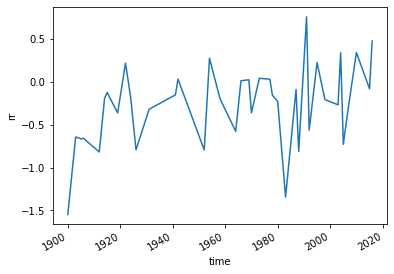

In [7]:
nino_rr.mean(dim=['lon','lat']).plot()

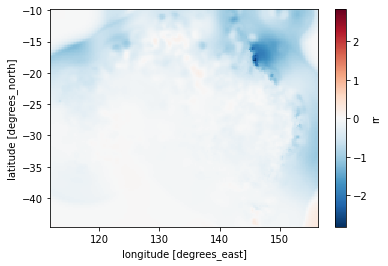

In [8]:
nino_rr.mean(dim='time').plot()

In [9]:
nina_rr=rr_summer.where(nino34_summer < -0.5, drop = True)

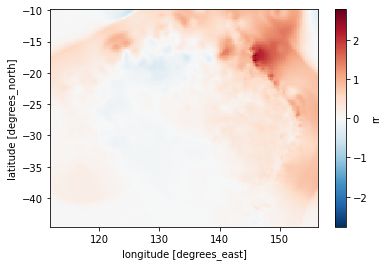

In [10]:
nina_rr.mean(dim='time').plot()

In [11]:
rr_SON=rr_anomaly.groupby('time.season')['SON']
rr_spring=rr_SON.resample(time='AS-SEP').mean()
rr_MAM=rr_anomaly.groupby('time.season')['MAM']
rr_autumn=rr_MAM.resample(time='AS-MAR').mean()
nino_DJF_rr=rr_summer.where(nino34_summer > 0.5, drop = True)
nina_DJF_rr=rr_summer.where(nino34_summer < -0.5, drop = True)
nino_SON_rr=rr_spring.where(nino34_spring > 0.5, drop = True)
nina_SON_rr=rr_spring.where(nino34_spring < -0.5, drop = True)
nino_MAM_rr=rr_autumn.where(nino34_autumn > 0.5, drop = True)
nina_MAM_rr=rr_autumn.where(nino34_autumn < -0.5, drop = True)
nino_EP_DJF_rr=rr_summer.where(nct_summer > 0.5, drop = True)
nina_EP_DJF_rr=rr_summer.where(nct_summer < -0.5, drop = True)
nino_EP_SON_rr=rr_spring.where(nct_spring > 0.5, drop = True)
nina_EP_SON_rr=rr_spring.where(nct_spring < -0.5, drop = True)
nino_EP_MAM_rr=rr_autumn.where(nct_autumn > 0.5, drop = True)
nina_EP_MAM_rr=rr_autumn.where(nct_autumn < -0.5, drop = True)
nino_CP_DJF_rr=rr_summer.where(nwp_summer > 0.5, drop = True)
nina_CP_DJF_rr=rr_summer.where(nwp_summer < -0.5, drop = True)
nino_CP_SON_rr=rr_spring.where(nwp_spring > 0.5, drop = True)
nina_CP_SON_rr=rr_spring.where(nwp_spring < -0.5, drop = True)
nino_CP_MAM_rr=rr_autumn.where(nwp_autumn > 0.5, drop = True)
nina_CP_MAM_rr=rr_autumn.where(nwp_autumn < -0.5, drop = True)

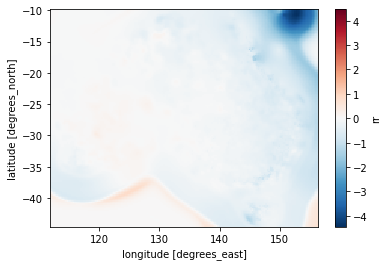

In [12]:
nino_CP_SON_rr.mean(dim='time').plot()

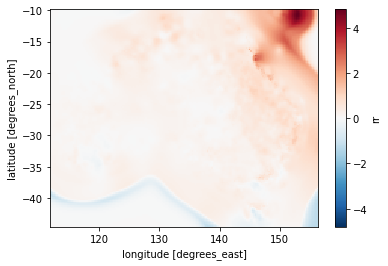

In [13]:
nina_CP_SON_rr.mean(dim='time').plot()

In [14]:
rr_summer

<xarray.DataArray 'rr' (time: 117, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -3.9133945 ,
         -3.8893409 , -3.7967856 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.9271827 ,
         -3.9626741 , -3.793651  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.937211  ,
         -3.9988317 , -3.9497159 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -3.4174888 ,
         -2.9050148 , -2.4563668 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.3822024 ,
         -2.8750331 , -2.4323716 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.312883  ,
         -2.8169312 , -2.5540478 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -3.5746205 ,
         -3.5457666 , -3.452223  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.581537  ,
         -3.610698  , -3.4451993 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.584402  ,
         -3.6389492 , -3.585188  ],
...
        [ 0.        ,  0.        ,  0.        , ..., -3.1678295 ,
         -2.7209141 , -2.3317091 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.1357841 ,
         -2.6937027 , -2.3096762 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.0743377 ,
         -2.6424408 , -2.4145408 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.5843718 ,
         -0.49767494, -0.37047863],
        [ 0.        ,  0.        ,  0.        , ..., -0.60996556,
         -0.57435894, -0.37386227],
        [ 0.        ,  0.        ,  0.        , ..., -0.6308296 ,
         -0.61550236, -0.50857615],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.6686995 ,
         -2.35285   , -2.0824893 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.6430602 ,
         -2.3311243 , -2.0643432 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.5973122 ,
         -2.2935078 , -2.1355724 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2015-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [15]:
nino34_summer

<xarray.DataArray 'sst' (time: 117)>
array([ 1.12651610e+00,  3.23069483e-01, -2.94438273e-01,  1.86975896e+00,
       -1.33412707e+00,  5.33201933e-01,  1.12735116e+00, -7.44159698e-01,
       -8.26658532e-02, -1.14420223e+00, -1.45258343e+00, -1.14889944e+00,
        1.01088893e+00, -5.74082553e-01,  5.48520744e-01,  1.35146606e+00,
       -8.92742217e-01, -1.98012543e+00, -1.38874018e+00,  1.43896544e+00,
        4.27135468e-01, -3.55838805e-01,  5.84956110e-01, -1.00729382e+00,
        6.67334616e-01, -1.53277218e+00,  1.04181004e+00, -7.71622241e-01,
        8.86874869e-02, -3.19535375e-01,  1.69248268e-01,  1.25954521e+00,
       -7.72438288e-01, -4.46255922e-01, -1.50689459e+00, -3.70119452e-01,
       -1.50760666e-01, -4.63783741e-01, -2.23085925e-01, -1.23675287e+00,
        1.64505899e-01,  1.55001628e+00,  9.86635029e-01, -1.80136597e+00,
       -3.86022657e-01, -6.14627421e-01, -4.80449826e-01, -3.15300196e-01,
       -5.03766358e-01, -8.22925329e-01, -1.20464456e+00, -7.94380128e-01,
        7.22320080e-01, -1.37383565e-02,  6.23088717e-01, -9.30862129e-01,
       -1.50701714e+00, -5.37067473e-01,  1.42154539e+00,  3.71693522e-01,
       -1.79422989e-01, -1.39379678e-02, -3.81874472e-01, -4.46755886e-01,
        1.09971011e+00, -9.04349267e-01,  1.64267504e+00, -1.66669592e-01,
       -3.76641750e-01,  8.08061659e-01,  7.62270510e-01, -9.21326816e-01,
       -7.27619350e-01,  2.01420474e+00, -1.67786121e+00, -4.70698088e-01,
       -1.39890540e+00,  9.21571732e-01,  8.68009269e-01, -6.63061917e-04,
        6.59209430e-01,  1.45110950e-01,  1.22952782e-01,  2.26126575e+00,
       -5.18658221e-01, -5.45290232e-01, -1.59807131e-01,  1.25870097e+00,
        1.47086847e+00, -1.39165962e+00,  1.02059267e-01,  6.26672983e-01,
        1.56597137e+00,  2.55817562e-01,  4.77561384e-01,  1.26577914e+00,
       -5.45760870e-01, -1.08960994e-01,  2.62958884e+00, -1.12180412e+00,
       -1.11202037e+00, -3.58129859e-01,  1.24985479e-01,  1.49927485e+00,
        7.05038130e-01,  1.05360663e+00, -1.29553691e-01,  1.13032854e+00,
       -1.06969452e+00, -1.85424134e-01,  1.58853948e+00, -1.20689249e+00,
       -6.03161752e-01,  3.69642824e-01,  1.01097703e-01,  8.69218647e-01,
        2.75447130e+00], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2015-12-01

In [16]:
nino_rr=rr_anomaly.where(nino34_modern > 0.5, drop = True)
nina_rr=rr_anomaly.where(nino34_modern < -0.5, drop = True)
nino_EP_rr=rr_anomaly.where(nct_modern > 0.5, drop = True)
nina_EP_rr=rr_anomaly.where(nct_modern < -0.5, drop = True)
nino_CP_rr=rr_anomaly.where(nwp_modern > 0.5, drop = True)
nina_CP_rr=rr_anomaly.where(nwp_modern < -0.5, drop = True)

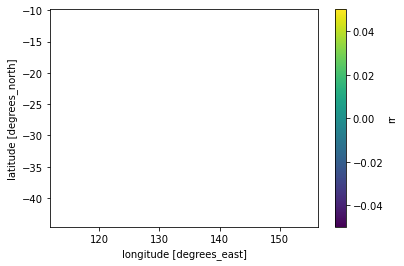

In [17]:
nina_CP_rr.mean(dim='time').plot()

In [18]:
nina_CP_rr

<xarray.DataArray 'rr' (time: 0, lat: 139, lon: 178)>
array([], shape=(0, 139, 178), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
    month    (time) int64

In [19]:
nino34_modern

<xarray.DataArray 'sst' (time: 1392)>
array([1.0314839, 1.2215484, 1.3459616, ..., 2.2351243, 2.5335004,
       2.7544713], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [20]:
rr_anomaly

<xarray.DataArray 'rr' (time: 1392, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -3.3157613 ,
         -3.2916677 , -3.2033987 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.320111  ,
         -3.3484056 , -3.198281  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.3209918 ,
         -3.3728461 , -3.3286824 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.7886353 ,
         -2.3755069 , -2.013216  ],
        [ 0.        ,  0.        ,  0.        , ..., -2.761191  ,
         -2.3512976 , -1.9929658 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7067397 ,
         -2.3045802 , -2.091221  ]],

       [[ 0.        ,  0.        ,  0.        , ..., -4.511028  ,
         -4.487014  , -4.3901725 ],
        [ 0.        ,  0.        ,  0.        , ..., -4.534254  ,
         -4.576943  , -4.3890214 ],
        [ 0.        ,  0.        ,  0.        , ..., -4.5534306 ,
         -4.6248174 , -4.5707493 ],
...
        [ 0.        ,  0.        ,  0.        , ..., -2.8850832 ,
         -2.4853134 , -2.1426907 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.8604503 ,
         -2.4659708 , -2.1281714 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.80536   ,
         -2.4221108 , -2.2205448 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.5843718 ,
         -0.49767494, -0.37047863],
        [ 0.        ,  0.        ,  0.        , ..., -0.60996556,
         -0.57435894, -0.37386227],
        [ 0.        ,  0.        ,  0.        , ..., -0.6308296 ,
         -0.61550236, -0.50857615],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.6686995 ,
         -2.35285   , -2.0824893 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.6430602 ,
         -2.3311243 , -2.0643432 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.5973122 ,
         -2.2935078 , -2.1355724 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [21]:
nino_rr

<xarray.DataArray 'rr' (time: 0, lat: 139, lon: 178)>
array([], shape=(0, 139, 178), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
    month    (time) int64

In [22]:
rr_anomaly

<xarray.DataArray 'rr' (time: 1392, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -3.3157613 ,
         -3.2916677 , -3.2033987 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.320111  ,
         -3.3484056 , -3.198281  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.3209918 ,
         -3.3728461 , -3.3286824 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.7886353 ,
         -2.3755069 , -2.013216  ],
        [ 0.        ,  0.        ,  0.        , ..., -2.761191  ,
         -2.3512976 , -1.9929658 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7067397 ,
         -2.3045802 , -2.091221  ]],

       [[ 0.        ,  0.        ,  0.        , ..., -4.511028  ,
         -4.487014  , -4.3901725 ],
        [ 0.        ,  0.        ,  0.        , ..., -4.534254  ,
         -4.576943  , -4.3890214 ],
        [ 0.        ,  0.        ,  0.        , ..., -4.5534306 ,
         -4.6248174 , -4.5707493 ],
...
        [ 0.        ,  0.        ,  0.        , ..., -2.8850832 ,
         -2.4853134 , -2.1426907 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.8604503 ,
         -2.4659708 , -2.1281714 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.80536   ,
         -2.4221108 , -2.2205448 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.5843718 ,
         -0.49767494, -0.37047863],
        [ 0.        ,  0.        ,  0.        , ..., -0.60996556,
         -0.57435894, -0.37386227],
        [ 0.        ,  0.        ,  0.        , ..., -0.6308296 ,
         -0.61550236, -0.50857615],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.6686995 ,
         -2.35285   , -2.0824893 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.6430602 ,
         -2.3311243 , -2.0643432 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.5973122 ,
         -2.2935078 , -2.1355724 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [23]:
nino34_modern

<xarray.DataArray 'sst' (time: 1392)>
array([1.0314839, 1.2215484, 1.3459616, ..., 2.2351243, 2.5335004,
       2.7544713], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [24]:
nino_EP_DJF_rr=

SyntaxError: invalid syntax (<ipython-input-24-65bf151c8deb>, line 1)

In [25]:
nino_EP_DJF_rr

<xarray.DataArray 'rr' (time: 34, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -3.9133945 ,
         -3.8893409 , -3.7967856 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.9271827 ,
         -3.9626741 , -3.793651  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.937211  ,
         -3.9988317 , -3.9497159 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -3.4174888 ,
         -2.9050148 , -2.4563668 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.3822024 ,
         -2.8750331 , -2.4323716 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.312883  ,
         -2.8169312 , -2.5540478 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -3.5623105 ,
         -3.538604  , -3.4471428 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.5668385 ,
         -3.602023  , -3.440678  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.5669987 ,
         -3.628708  , -3.5797741 ],
...
        [ 0.        ,  0.        ,  0.        , ..., -3.1678295 ,
         -2.7209141 , -2.3317091 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.1357841 ,
         -2.6937027 , -2.3096762 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.0743377 ,
         -2.6424408 , -2.4145408 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.5843718 ,
         -0.49767494, -0.37047863],
        [ 0.        ,  0.        ,  0.        , ..., -0.60996556,
         -0.57435894, -0.37386227],
        [ 0.        ,  0.        ,  0.        , ..., -0.6308296 ,
         -0.61550236, -0.50857615],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.6686995 ,
         -2.35285   , -2.0824893 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.6430602 ,
         -2.3311243 , -2.0643432 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.5973122 ,
         -2.2935078 , -2.1355724 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1902-12-01 ... 2015-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [26]:
nino_DJF_mean=nino_DJF_rr.mean(dim='time')
nina_DJF_mean=nina_DJF_rr.mean(dim='time')
nino_SON_mean=nino_SON_rr.mean(dim='time')
nina_SON_mean=nina_SON_rr.mean(dim='time')
nino_MAM_mean=nino_MAM_rr.mean(dim='time')
nina_MAM_mean=nina_MAM_rr.mean(dim='time')
nino_EP_DJF_mean=nino_EP_DJF_rr.mean(dim='time')
nina_EP_DJF_mean=nina_EP_DJF_rr.mean(dim='time')
nino_EP_SON_mean=nino_EP_SON_rr.mean(dim='time')
nina_EP_SON_mean=nina_EP_SON_rr.mean(dim='time')
nino_EP_MAM_mean=nino_EP_MAM_rr.mean(dim='time')
nina_EP_MAM_mean=nina_EP_MAM_rr.mean(dim='time')
nino_CP_DJF_mean=nino_CP_DJF_rr.mean(dim='time')
nina_CP_DJF_mean=nina_CP_DJF_rr.mean(dim='time')
nino_CP_SON_mean=nino_CP_SON_rr.mean(dim='time')
nina_CP_SON_mean=nina_CP_SON_rr.mean(dim='time')
nino_CP_MAM_mean=nino_CP_MAM_rr.mean(dim='time')
nina_CP_MAM_mean=nina_CP_MAM_rr.mean(dim='time')

In [27]:
nino_DJF_mean

<xarray.DataArray 'rr' (lat: 139, lon: 178)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.2587272 ,
         0.2856161 ,  0.32122308],
       [ 0.        ,  0.        ,  0.        , ...,  0.25378603,
         0.2745053 ,  0.33639383],
       [ 0.        ,  0.        ,  0.        , ...,  0.25014654,
         0.26724133,  0.3142694 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.6513492 ,
        -0.50214076, -0.3821405 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.6441466 ,
        -0.49678048, -0.37792224],
       [ 0.        ,  0.        ,  0.        , ..., -0.6252446 ,
        -0.4832235 , -0.4104062 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

Text(0.5, 1.0, 'El Nino composite DJF')

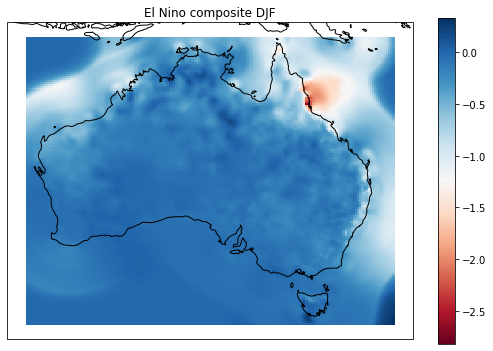

In [28]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_DJF_mean.lon, nino_DJF_mean.lat, nino_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino composite DJF')

In [29]:
ds3=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/bom_aust_mask_smooth.nc')
landmask=ds3.landmask

In [30]:
nino_DJF_mean=nino_DJF_mean.where(landmask>0)
nina_DJF_mean=nina_DJF_mean.where(landmask>0)
nino_SON_mean=nino_SON_mean.where(landmask>0)
nina_SON_mean=nina_SON_mean.where(landmask>0)
nino_MAM_mean=nino_MAM_mean.where(landmask>0)
nina_MAM_mean=nina_MAM_mean.where(landmask>0)
nino_EP_DJF_mean=nino_EP_DJF_mean.where(landmask>0)
nina_EP_DJF_mean=nina_EP_DJF_mean.where(landmask>0)
nino_EP_SON_mean=nino_EP_SON_mean.where(landmask>0)
nina_EP_SON_mean=nina_EP_SON_mean.where(landmask>0)
nino_EP_MAM_mean=nino_EP_MAM_mean.where(landmask>0)
nina_EP_MAM_mean=nina_EP_MAM_mean.where(landmask>0)
nino_CP_DJF_mean=nino_CP_DJF_mean.where(landmask>0)
nina_CP_DJF_mean=nina_CP_DJF_mean.where(landmask>0)
nino_CP_SON_mean=nino_CP_SON_mean.where(landmask>0)
nina_CP_SON_mean=nina_CP_SON_mean.where(landmask>0)
nino_CP_MAM_mean=nino_CP_MAM_mean.where(landmask>0)
nina_CP_MAM_mean=nina_CP_MAM_mean.where(landmask>0)

Text(0.5, 1.0, 'El Nino composite DJF')

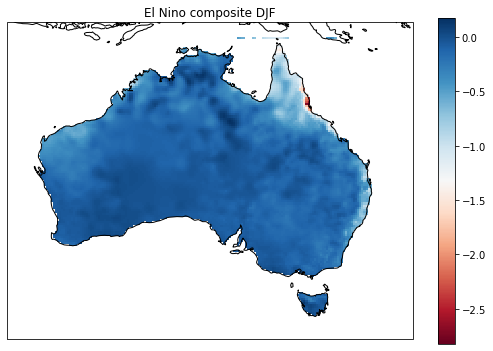

In [31]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_DJF_mean.lon, nino_DJF_mean.lat, nino_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino composite DJF')

Text(0.5, 1.0, 'El Nino composite DJF')

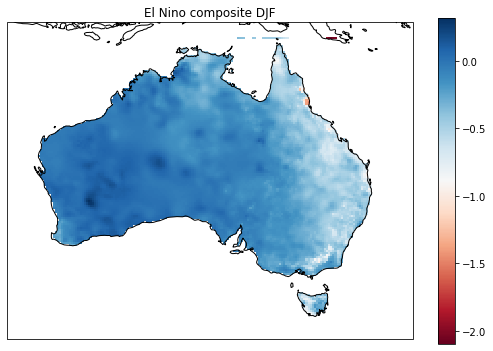

In [32]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_SON_mean.lon, nino_CP_SON_mean.lat, nino_CP_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino composite DJF')

Text(0.5, 1.0, 'El Nino composite DJF')

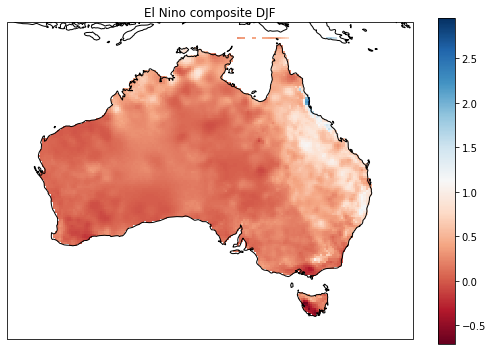

In [33]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_SON_mean.lon, nina_CP_SON_mean.lat, nina_CP_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino composite DJF')

In [34]:
#below are formal plots#

Text(0.5, 1.0, 'El Nino composite DJF')

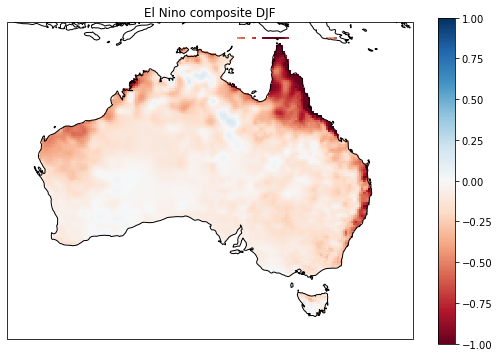

In [35]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_DJF_mean.lon, nino_DJF_mean.lat, nino_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino composite DJF')

Text(0.5, 1.0, 'La Nina composite DJF')

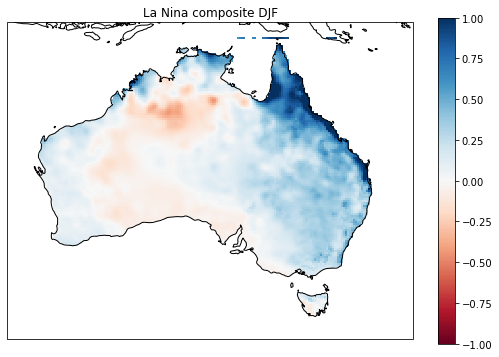

In [36]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_DJF_mean.lon, nina_DJF_mean.lat, nina_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina composite DJF')

Text(0.5, 1.0, 'El Nino composite SON')

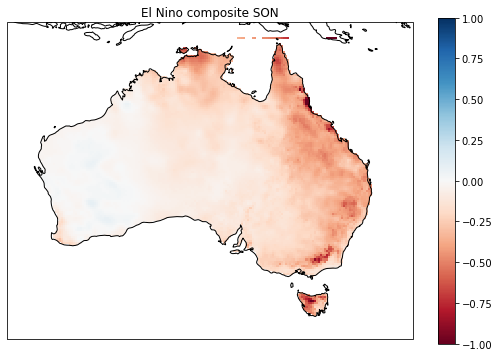

In [37]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_SON_mean.lon, nino_SON_mean.lat, nino_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino composite SON')

Text(0.5, 1.0, 'La Nina composite SON')

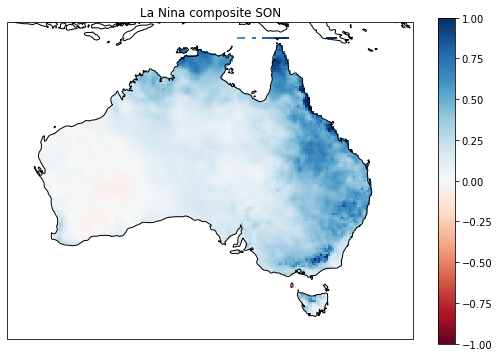

In [38]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_SON_mean.lon, nina_SON_mean.lat, nina_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina composite SON')

Text(0.5, 1.0, 'El Nino composite MAM')

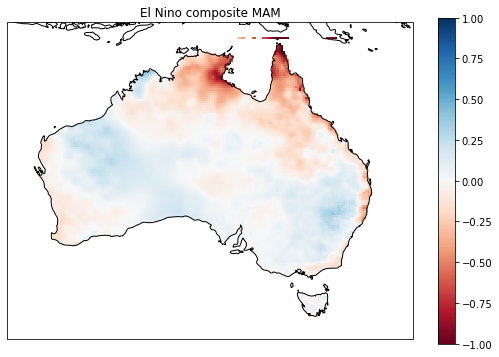

In [39]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_MAM_mean.lon, nino_MAM_mean.lat, nino_MAM_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino composite MAM')

Text(0.5, 1.0, 'La Nina composite MAM')

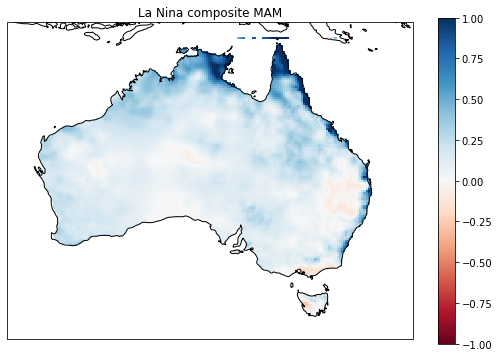

In [40]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_MAM_mean.lon, nina_MAM_mean.lat, nina_MAM_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina composite MAM')

Text(0.5, 1.0, 'El Nino (EP) composite DJF')

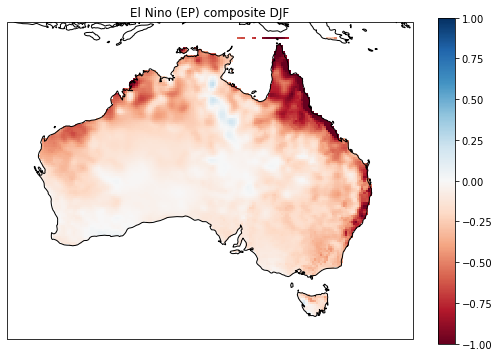

In [41]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_EP_DJF_mean.lon, nino_EP_DJF_mean.lat, nino_EP_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino (EP) composite DJF')

Text(0.5, 1.0, 'La Nina (EP) composite DJF')

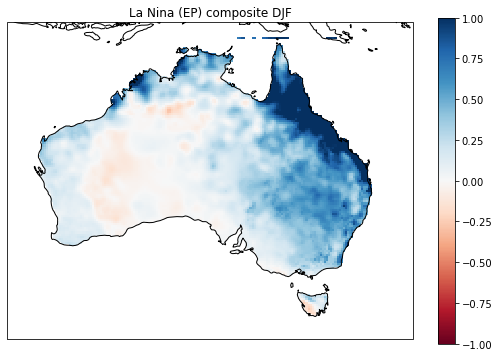

In [42]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_EP_DJF_mean.lon, nina_EP_DJF_mean.lat, nina_EP_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina (EP) composite DJF')

Text(0.5, 1.0, 'El Nino (EP) composite SON')

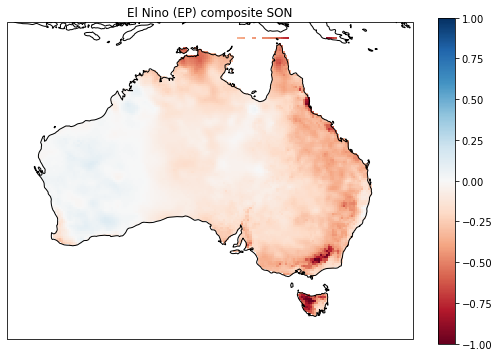

In [43]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_EP_SON_mean.lon, nino_EP_SON_mean.lat, nino_EP_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino (EP) composite SON')

Text(0.5, 1.0, 'La Nina (EP) composite SON')

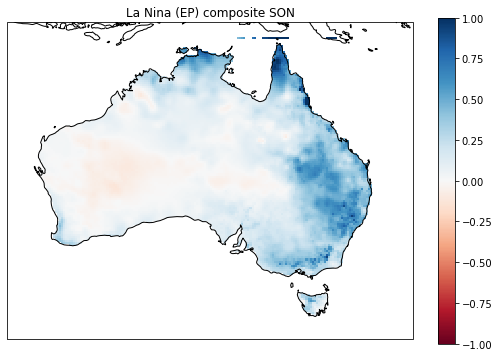

In [44]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_EP_SON_mean.lon, nina_EP_SON_mean.lat, nina_EP_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina (EP) composite SON')

Text(0.5, 1.0, 'El Nino (EP) composite MAM')

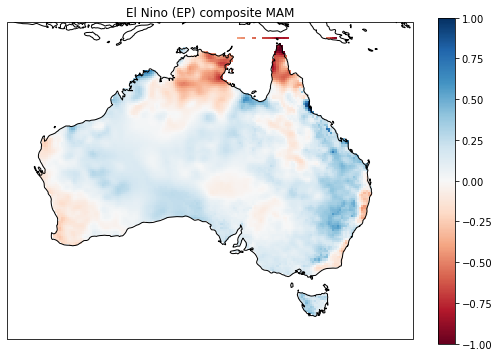

In [45]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_EP_MAM_mean.lon, nino_EP_MAM_mean.lat, nino_EP_MAM_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino (EP) composite MAM')

Text(0.5, 1.0, 'La Nina (EP) composite MAM')

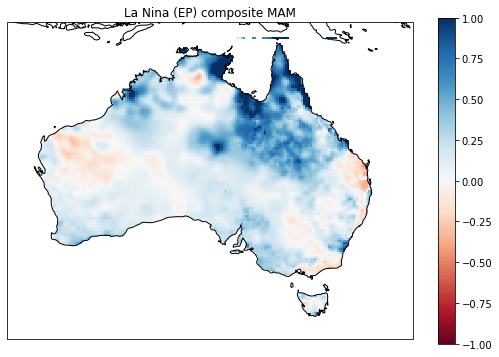

In [46]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_EP_MAM_mean.lon, nina_EP_MAM_mean.lat, nina_EP_MAM_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina (EP) composite MAM')

Text(0.5, 1.0, 'El Nino (CP) composite DJF')

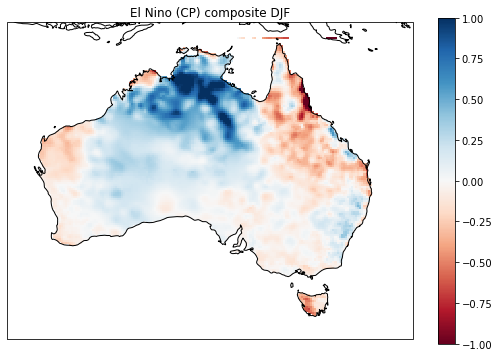

In [47]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_DJF_mean.lon, nino_CP_DJF_mean.lat, nino_CP_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino (CP) composite DJF')

Text(0.5, 1.0, 'La Nina (CP) composite DJF')

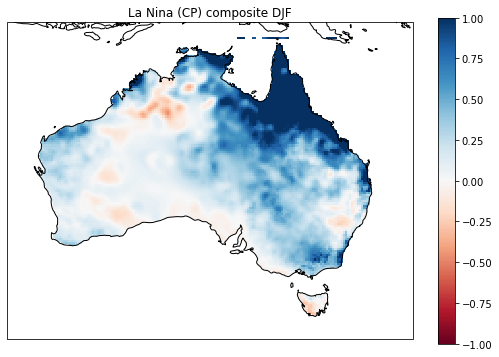

In [48]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_DJF_mean.lon, nina_CP_DJF_mean.lat, nina_CP_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina (CP) composite DJF')

Text(0.5, 1.0, 'El Nino (CP) composite SON')

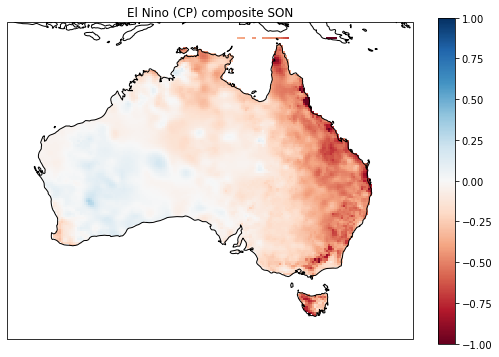

In [49]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_SON_mean.lon, nino_CP_SON_mean.lat, nino_CP_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino (CP) composite SON')

Text(0.5, 1.0, 'La Nina (CP) composite SON')

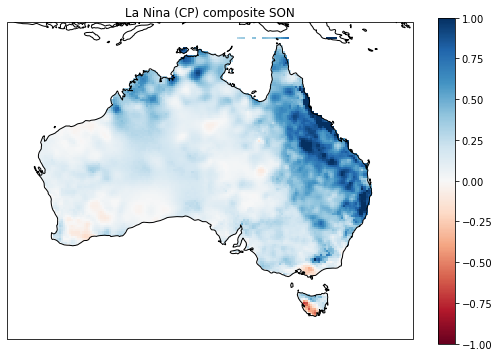

In [50]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_SON_mean.lon, nina_CP_SON_mean.lat, nina_CP_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina (CP) composite SON')

Text(0.5, 1.0, 'El Nino (CP) composite MAM')

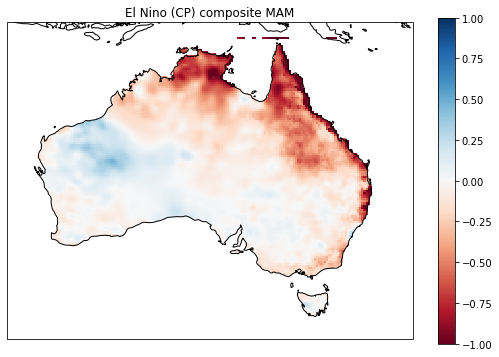

In [51]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_MAM_mean.lon, nino_CP_MAM_mean.lat, nino_CP_MAM_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino (CP) composite MAM')

Text(0.5, 1.0, 'La Nina (CP) composite MAM')

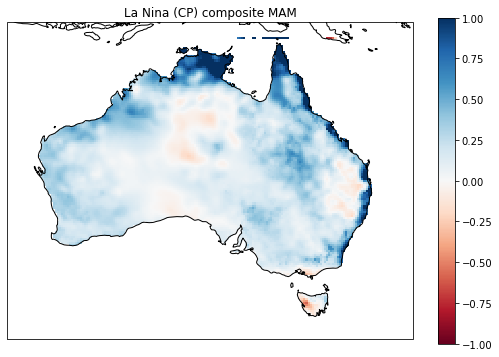

In [52]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_MAM_mean.lon, nina_CP_MAM_mean.lat, nina_CP_MAM_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina (CP) composite MAM')